In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Simulations #1

## Read CSVs

In [35]:
rashomon_csv = "../Results/worst_case_rashomon.csv"
rashomon_raw_df = pd.read_csv(rashomon_csv)
rashomon_raw_df = rashomon_raw_df.drop("Unnamed: 0", axis=1)
rashomon_raw_df.head()

,n_per_pol,sim_num,num_pools,MSE,IOU,min_dosage,best_pol_diff
0,10,0,4,1.273589,0.666667,True,0.431312
1,10,0,6,1.273541,0.666667,True,0.431312
2,10,0,6,1.246443,0.666667,True,0.431312
3,10,0,6,1.163541,0.500000,True,-0.031748
4,10,0,6,0.882880,1.000000,True,-0.124469


In [36]:
lasso_csv = "../Results/worst_case_lasso.csv"
lasso_raw_df = pd.read_csv(lasso_csv)
lasso_raw_df = lasso_raw_df.drop("Unnamed: 0", axis=1)
lasso_raw_df.head()

,n_per_pol,sim_num,MSE,L1_loss,IOU,min_dosage,best_pol_diff
0,10,0,1.292713,1.815938,0.0,False,0.767750
1,10,1,1.306908,1.829085,0.0,False,0.778222
2,10,2,1.213292,1.753783,0.0,False,0.595090
3,10,3,1.438126,1.972719,0.0,False,0.654070
4,10,4,1.455133,1.967549,0.0,False,0.875831


In [37]:
ct_csv = "../Results/worst_case_causal_trees.csv"
ct_raw_df = pd.read_csv(ct_csv)
ct_raw_df = ct_raw_df.drop("Unnamed: 0", axis=1)
ct_raw_df.head()

,n_per_pol,sim_num,MSE,IOU,min_dosage,best_pol_diff
0,10,0,0.882880,1.0,True,-0.124469
1,10,1,0.877615,1.0,True,-0.427215
2,10,2,0.877615,1.0,True,-0.427215
3,10,3,0.877615,1.0,True,-0.427215
4,10,4,0.877615,1.0,True,-0.427215


## Summarize rashomon sets results

In [38]:
rashomon_df = rashomon_raw_df.copy()

rashomon_df["best_pol_MSE"] = rashomon_df["best_pol_diff"]**2

group_by_cols = ["n_per_pol", "sim_num"]
result_cols = ["num_pools", "MSE", "IOU", "min_dosage", "best_pol_MSE"]
for result_col in result_cols:
    result_min_col = result_col + "_min"
    result_avg_col = result_col + "_mean"
    result_max_col = result_col + "_max"
    result_var_col = result_col + "_var"
    
    rashomon_df[result_min_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("min")
    rashomon_df[result_avg_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("mean")
    rashomon_df[result_max_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("max")
    rashomon_df[result_var_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("var")

rashomon_df = rashomon_df.drop_duplicates(group_by_cols)
rashomon_df = rashomon_df.drop(result_cols, axis=1)
rashomon_df = rashomon_df.drop(["best_pol_diff"], axis=1)
rashomon_df.head(n=10)

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,4,6.750000,9,3.071429,0.853268,1.056888,1.273589,0.039268,...,1.0,0.047619,False,0.875000,True,0.125000,0.001008,0.081593,0.186030,0.007644
8,10,1,4,6.750000,9,3.071429,0.940916,1.143865,1.351151,0.035473,...,1.0,0.047619,False,0.875000,True,0.125000,0.001543,0.152435,0.361632,0.030337
16,10,2,4,6.333333,9,2.606061,0.831106,1.162066,1.349434,0.058437,...,1.0,0.035985,False,0.916667,True,0.083333,0.000141,0.405905,1.090605,0.195139
28,10,3,4,6.571429,9,4.619048,0.999373,1.206772,1.556189,0.066699,...,1.0,0.054233,True,1.000000,True,0.000000,0.009221,0.150018,0.694018,0.062911
35,10,4,4,7.000000,9,4.000000,0.942567,1.089282,1.433604,0.045067,...,1.0,0.062963,True,1.000000,True,0.000000,0.026816,0.080342,0.259708,0.008189
41,10,5,4,6.400000,9,3.155556,0.861775,1.158657,1.583911,0.067422,...,1.0,0.043519,False,0.800000,True,0.177778,0.001373,0.115434,0.686098,0.042811
51,10,6,4,7.000000,9,4.000000,0.961025,1.111481,1.437311,0.042469,...,1.0,0.062963,False,0.833333,True,0.166667,0.000074,0.061423,0.349174,0.019895
57,10,7,4,6.400000,9,3.155556,0.961201,1.209663,1.520150,0.048061,...,1.0,0.043519,False,0.900000,True,0.100000,0.053490,0.478465,1.688050,0.290784
67,10,8,4,6.857143,9,3.476190,0.979523,1.146745,1.434280,0.039462,...,1.0,0.054233,True,1.000000,True,0.000000,0.003527,0.074415,0.216703,0.009557
74,10,9,4,6.750000,9,3.071429,0.997503,1.147400,1.308940,0.022019,...,1.0,0.047619,True,1.000000,True,0.000000,0.005274,0.186101,0.475842,0.057618


## Average over simulations

In [39]:
sum_cols = [
    "num_pools_min", "num_pools_mean", "num_pools_max", "num_pools_var",
    "MSE_min", "MSE_mean", "MSE_max", "MSE_var",
    "IOU_min", "IOU_mean", "IOU_max", "IOU_var",
    "min_dosage_min", "min_dosage_mean", "min_dosage_max", "min_dosage_var",
    "best_pol_MSE_min", "best_pol_MSE_mean", "best_pol_MSE_max", "best_pol_MSE_var"
]

for sum_col in sum_cols:
    rashomon_df[sum_col] = rashomon_df.groupby("n_per_pol")[sum_col].transform("mean")

rashomon_df = rashomon_df.drop_duplicates("n_per_pol")
rashomon_df.head()

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,4.04,6.664754,8.91,3.419607,0.925803,1.140127,1.449453,0.046629,...,1.0,0.049794,0.44,0.894185,1.0,0.095748,0.022374,0.200069,0.642109,0.073872
905,100,0,4.00,6.743858,9.00,3.297025,0.991623,1.165520,1.405384,0.037915,...,1.0,0.049614,0.44,0.921789,1.0,0.076777,0.002441,0.105591,0.364920,0.030087
1690,1000,0,4.00,6.760000,9.00,3.108571,0.999279,1.171630,1.372884,0.035664,...,1.0,0.048233,0.48,0.934167,1.0,0.065833,0.000264,0.091731,0.249096,0.016358
2482,5000,0,4.00,6.750000,9.00,3.071429,1.000382,1.176021,1.375080,0.036189,...,1.0,0.047619,0.46,0.932500,1.0,0.067500,0.000055,0.093966,0.250364,0.016789


In [40]:
lasso_df = lasso_raw_df.copy()

lasso_df["best_pol_MSE"] = lasso_df["best_pol_diff"]**2
sum_cols_lasso = ["MSE", "L1_loss", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_lasso:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"
    
    lasso_df[result_min_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("min")
    lasso_df[result_avg_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("mean")
    lasso_df[result_max_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("max")
    lasso_df[result_var_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("var")

lasso_df = lasso_df.drop_duplicates("n_per_pol")
lasso_df = lasso_df.drop(sum_cols_lasso, axis=1)
lasso_df = lasso_df.drop(["best_pol_diff"], axis=1)
lasso_df.head(n=10)

,n_per_pol,sim_num,MSE_min,MSE_mean,MSE_max,MSE_var,L1_loss_min,L1_loss_mean,L1_loss_max,L1_loss_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,1.008689,1.317999,1.755309,0.019280,1.521755,1.840381,2.269648,0.019690,...,0.666667,0.010505,False,0.01,True,0.01,0.002666,0.644493,1.494646,0.096290
100,100,0,1.255466,1.351934,1.448634,0.001654,1.776271,1.873097,1.973138,0.001719,...,0.000000,0.000000,False,0.00,False,0.00,0.399386,0.626152,0.982225,0.011811
200,1000,0,1.319118,1.357715,1.398697,0.000230,1.839873,1.878554,1.925381,0.000243,...,0.000000,0.000000,False,0.00,False,0.00,0.537522,0.627140,0.700546,0.001246
300,5000,0,1.342784,1.360589,1.375497,0.000043,1.864177,1.881055,1.895010,0.000043,...,0.000000,0.000000,False,0.00,False,0.00,0.593887,0.632650,0.678142,0.000204


In [41]:
ct_df = ct_raw_df.copy()

ct_df["best_pol_MSE"] = ct_df["best_pol_diff"]**2
sum_cols_ct = ["MSE", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_ct:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"
    
    ct_df[result_min_col] = ct_df.groupby("n_per_pol")[sum_col].transform("min")
    ct_df[result_avg_col] = ct_df.groupby("n_per_pol")[sum_col].transform("mean")
    ct_df[result_max_col] = ct_df.groupby("n_per_pol")[sum_col].transform("max")
    ct_df[result_var_col] = ct_df.groupby("n_per_pol")[sum_col].transform("var")

ct_df = ct_df.drop_duplicates("n_per_pol")
ct_df = ct_df.drop(sum_cols_ct, axis=1)
ct_df = ct_df.drop(["best_pol_diff"], axis=1)
ct_df.head(n=10)

,n_per_pol,sim_num,MSE_min,MSE_mean,MSE_max,MSE_var,IOU_min,IOU_mean,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,0.877615,0.877668,0.882880,2.771541e-07,1.0,1.0,1.0,0.0,True,1.0,True,0.0,0.015493,0.180842,0.182512,0.000279
100,100,0,1.013046,1.013046,1.013046,0.000000e+00,1.0,1.0,1.0,0.0,True,1.0,True,0.0,0.004467,0.004467,0.004467,0.000000
200,1000,0,1.001680,1.001680,1.001680,0.000000e+00,1.0,1.0,1.0,0.0,True,1.0,True,0.0,0.001372,0.001372,0.001372,0.000000
300,5000,0,0.998515,0.998515,0.998515,0.000000e+00,1.0,1.0,1.0,0.0,True,1.0,True,0.0,0.000092,0.000092,0.000092,0.000000


## Plots

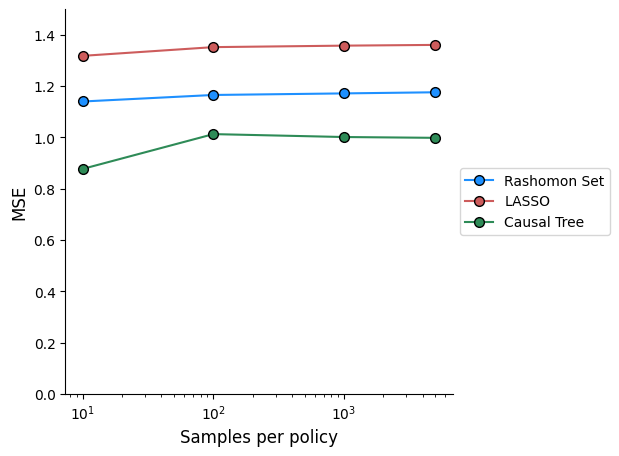

In [42]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["MSE_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["MSE_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax.plot(ct_df["n_per_pol"], ct_df["MSE_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy", fontsize=12)
ax.set_ylim(0, 1.5)
ax.set_ylabel("MSE", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("../Figures/worst_case/MSE.png", dpi=300, bbox_inches="tight")
plt.show()

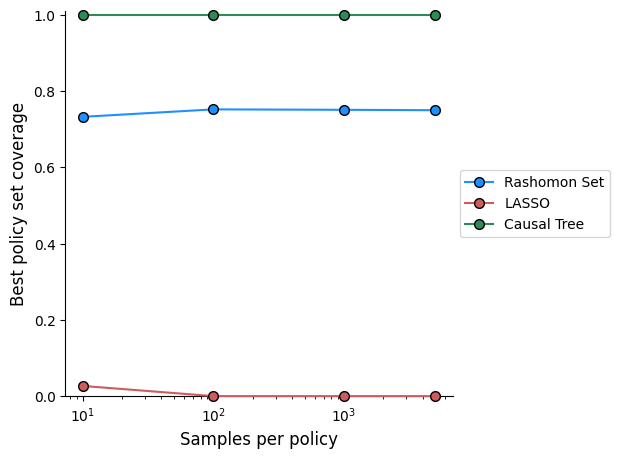

In [43]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["IOU_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["IOU_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax.plot(ct_df["n_per_pol"], ct_df["IOU_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy", fontsize=12)
ax.set_ylim(0, 1.01)
ax.set_ylabel("Best policy set coverage", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("../Figures/worst_case/policy_coverage.png", dpi=300, bbox_inches="tight")
plt.show()

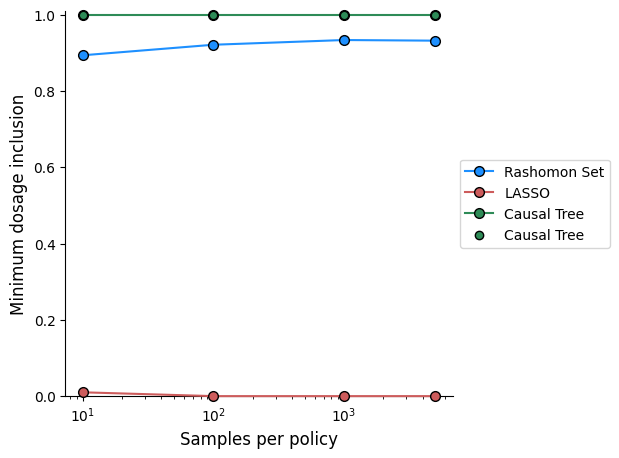

In [44]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["min_dosage_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["min_dosage_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")


ax.plot(ct_df["n_per_pol"], ct_df["min_dosage_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="Causal Tree")
ax.scatter(ct_df["n_per_pol"], ct_df["min_dosage_mean"],
           color="seagreen", edgecolor="black", zorder=3.5, clip_on=False,
           label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy", fontsize=12)
ax.set_ylim(0, 1.01)
ax.set_ylabel("Minimum dosage inclusion", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("../Figures/worst_case/min_dosage_inclusion.png", dpi=300, bbox_inches="tight")
plt.show()

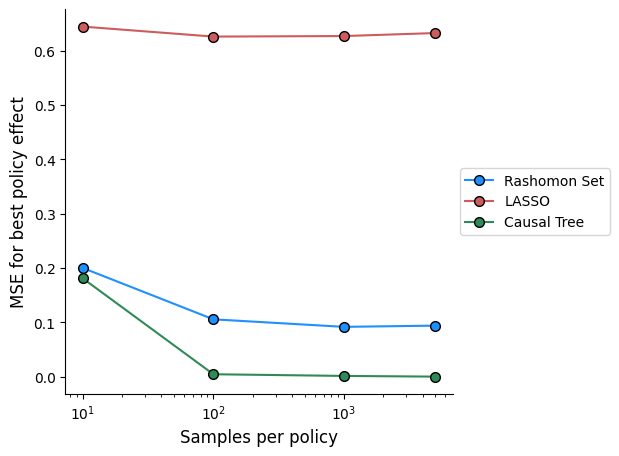

In [45]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["best_pol_MSE_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["best_pol_MSE_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax.plot(ct_df["n_per_pol"], ct_df["best_pol_MSE_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy", fontsize=12)
# ax.set_ylim(0, 1)
ax.set_ylabel("MSE for best policy effect", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("../Figures/worst_case/best_policy_MSE.png", dpi=300, bbox_inches="tight")
plt.show()

# Simulations #2

In [106]:
rashomon_csv = "../Results/simulation_2_rashomon.csv"
rashomon_raw_df = pd.read_csv(rashomon_csv)
rashomon_raw_df = rashomon_raw_df.drop("Unnamed: 0", axis=1)
rashomon_raw_df.head()

,n_per_pol,sim_num,num_pools,MSE,IOU,min_dosage,best_pol_diff,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
0,10,0,9,1.095476,0.0,False,-0.290068,0,0,1,0,0,0,0,0
1,10,0,10,1.030921,0.0,False,-0.290068,0,0,1,0,0,0,0,0
2,10,0,10,1.082229,0.0,False,-0.290068,0,0,1,0,0,0,0,0
3,10,0,10,1.086539,0.0,False,-0.290068,0,0,1,0,0,0,0,0
4,10,0,10,1.092376,0.0,False,-0.290068,0,0,1,0,0,0,0,0


In [107]:
lasso_csv = "../Results/simulation_2_lasso.csv"
lasso_raw_df = pd.read_csv(lasso_csv)
lasso_raw_df = lasso_raw_df.drop("Unnamed: 0", axis=1)
lasso_raw_df.head()

,n_per_pol,sim_num,MSE,L1_loss,IOU,min_dosage,best_pol_diff,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
0,10,0,1.668711,2.461437,1.0,True,0.788835,0,0,0,0,0,0,0,1
1,10,1,1.678821,2.489000,1.0,True,0.447601,0,0,0,0,0,0,0,1
2,10,2,1.678821,2.489000,1.0,True,0.447601,0,0,0,0,0,0,0,1
3,10,3,1.678821,2.489000,1.0,True,0.447601,0,0,0,0,0,0,0,1
4,10,4,1.678821,2.489000,1.0,True,0.447601,0,0,0,0,0,0,0,1


In [108]:
ct_csv = "../Results/simulation_2_causal_trees.csv"
ct_raw_df = pd.read_csv(ct_csv)
ct_raw_df = ct_raw_df.drop("Unnamed: 0", axis=1)
ct_raw_df.head()

,n_per_pol,sim_num,MSE,IOU,min_dosage,best_pol_diff,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
0,10,0,0.969067,0.0,False,-0.290068,1,0,1,0,0,0,0,0
1,10,1,0.992125,0.9,True,-0.263510,1,0,0,0,0,0,0,1
2,10,2,0.992125,0.9,True,-0.263510,1,0,0,0,0,0,0,1
3,10,3,0.992125,0.9,True,-0.263510,1,0,0,0,0,0,0,1
4,10,4,0.992125,0.9,True,-0.263510,1,0,0,0,0,0,0,1


### Summarize Rashomon results

In [109]:
rashomon_df = rashomon_raw_df.copy()

reg = 1e-1
rashomon_df["best_pol_MSE"] = rashomon_df["best_pol_diff"]**2
rashomon_df["loss"] = rashomon_df["MSE"] + reg * rashomon_df["num_pools"]

group_by_cols = ["n_per_pol", "sim_num"]
result_cols = ["num_pools", "MSE", "IOU", "min_dosage", "best_pol_MSE"]
for result_col in result_cols:
    result_min_col = result_col + "_min"
    result_avg_col = result_col + "_mean"
    result_max_col = result_col + "_max"
    result_var_col = result_col + "_var"
    
    rashomon_df[result_min_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("min")
    rashomon_df[result_avg_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("mean")
    rashomon_df[result_max_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("max")
    rashomon_df[result_var_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("var")


# Find the frequency of best profiles in Rashomon set
# Also find the best profile in the best model in every set
profiles = []
profile_cols = ["(0, 0, 0)", "(0, 0, 1)", "(0, 1, 0)", "(0, 1, 1)",
                "(1, 0, 0)", "(1, 0, 1)", "(1, 1, 0)", "(1, 1, 1)"]
x = rashomon_df.groupby(group_by_cols)["loss"].idxmin()
for profile in profile_cols:
    profile_mean_col = profile + "_mean"
    profile_best_col = profile + "_best"
    rashomon_df[profile_mean_col] = rashomon_df.groupby(group_by_cols)[profile].transform("mean")
    rashomon_df[profile_best_col] = rashomon_df[profile].loc[x]
    

rashomon_df = rashomon_df.drop_duplicates(group_by_cols)
rashomon_df = rashomon_df.drop(result_cols, axis=1)
rashomon_df = rashomon_df.drop(profile_cols, axis=1)
rashomon_df = rashomon_df.drop(["best_pol_diff", "loss"], axis=1)
rashomon_df.head(n=10)

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,"(0, 1, 1)_mean","(0, 1, 1)_best","(1, 0, 0)_mean","(1, 0, 0)_best","(1, 0, 1)_mean","(1, 0, 1)_best","(1, 1, 0)_mean","(1, 1, 0)_best","(1, 1, 1)_mean","(1, 1, 1)_best"
0,10,0,8,10.740506,12,0.459433,0.991376,1.100972,1.272690,0.003669,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.151899,0.0
316,10,1,8,10.384615,12,0.889684,0.995960,1.119804,1.261519,0.006788,...,0.0,0.0,0.0,0.0,0.007692,0.0,0.0,0.0,0.607692,0.0
446,10,2,8,11.064795,12,0.675446,0.970601,1.048051,1.230158,0.004264,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.140389,0.0
909,10,3,8,10.979675,12,0.635024,0.949083,1.072005,1.229720,0.004404,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.524390,0.0
1401,10,4,8,11.690905,13,0.667792,0.866920,0.973882,1.054710,0.003280,...,0.0,0.0,0.0,0.0,0.000217,0.0,0.0,0.0,0.692642,1.0
6008,10,5,8,9.918605,11,0.546238,1.047205,1.165898,1.257534,0.004525,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.720930,0.0
6094,10,6,8,11.062500,12,0.651618,0.977099,1.064038,1.233895,0.004244,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.179167,0.0
6574,10,7,8,10.889016,12,0.632571,0.911856,1.046932,1.158573,0.005741,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.732265,1.0
7448,10,8,8,10.685422,12,0.431556,0.958518,1.098682,1.212271,0.002533,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.401535,0.0
7839,10,9,8,10.831776,12,0.575176,0.932282,1.060600,1.151453,0.004053,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.747664,1.0


### Average over simulations

In [110]:
sum_cols = [
    "num_pools_min", "num_pools_mean", "num_pools_max", "num_pools_var",
    "MSE_min", "MSE_mean", "MSE_max", "MSE_var",
    "IOU_min", "IOU_mean", "IOU_max", "IOU_var",
    "min_dosage_min", "min_dosage_mean", "min_dosage_max", "min_dosage_var",
    "best_pol_MSE_min", "best_pol_MSE_mean", "best_pol_MSE_max", "best_pol_MSE_var",
]
sum_cols += [profile + "_best" for profile in profile_cols]
sum_cols += [profile + "_mean" for profile in profile_cols]

for sum_col in sum_cols:
    rashomon_df[sum_col] = rashomon_df.groupby("n_per_pol")[sum_col].transform("mean")

rashomon_df = rashomon_df.drop_duplicates("n_per_pol")
rashomon_df.head()

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,"(0, 1, 1)_mean","(0, 1, 1)_best","(1, 0, 0)_mean","(1, 0, 0)_best","(1, 0, 1)_mean","(1, 0, 1)_best","(1, 1, 0)_mean","(1, 1, 0)_best","(1, 1, 1)_mean","(1, 1, 1)_best"
0,10,0,8.02,10.598062,11.78,0.618431,0.973361,1.098937,1.216923,0.004920,...,0.0,0.0,0.0,0.0,0.003077,0.0,0.0,0.0,0.611369,0.48
65876,100,0,8.00,10.262058,11.58,0.642706,0.996468,1.126019,1.236502,0.005176,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.665964,0.24
83788,1000,0,8.00,10.233691,11.52,0.712100,0.999348,1.123487,1.237864,0.005132,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.628492,0.01
96384,5000,0,8.00,10.249275,11.49,0.743979,1.000128,1.121350,1.238802,0.005061,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.608439,0.00


In [111]:
lasso_df = lasso_raw_df.copy()

lasso_df["best_pol_MSE"] = lasso_df["best_pol_diff"]**2
sum_cols_lasso = ["MSE", "L1_loss", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_lasso:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"
    
    lasso_df[result_min_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("min")
    lasso_df[result_avg_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("mean")
    lasso_df[result_max_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("max")
    lasso_df[result_var_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("var")


for profile in profile_cols:
    profile_mean_col = profile + "_mean"
    lasso_df[profile_mean_col] = lasso_df.groupby("n_per_pol")[profile].transform("mean")

lasso_df = lasso_df.drop_duplicates("n_per_pol")
lasso_df = lasso_df.drop(sum_cols_lasso, axis=1)
lasso_df = lasso_df.drop(["best_pol_diff"], axis=1)
lasso_df = lasso_df.drop(profile_cols, axis=1)
lasso_df.head(n=10)

,n_per_pol,sim_num,MSE_min,MSE_mean,MSE_max,MSE_var,L1_loss_min,L1_loss_mean,L1_loss_max,L1_loss_var,...,best_pol_MSE_max,best_pol_MSE_var,"(0, 0, 0)_mean","(0, 0, 1)_mean","(0, 1, 0)_mean","(0, 1, 1)_mean","(1, 0, 0)_mean","(1, 0, 1)_mean","(1, 1, 0)_mean","(1, 1, 1)_mean"
0,10,0,1.668711,1.678719,1.678821,0.000001,2.461437,2.488724,2.489000,0.000008,...,0.622261,0.00178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100,100,0,1.661364,1.661364,1.661364,0.000000,2.452427,2.452427,2.452427,0.000000,...,0.472763,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
200,1000,0,1.654596,1.654596,1.654596,0.000000,2.438969,2.438969,2.438969,0.000000,...,0.495776,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,5000,0,1.644182,1.644182,1.644182,0.000000,2.426932,2.426932,2.426932,0.000000,...,0.510069,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [112]:
ct_df = ct_raw_df.copy()

ct_df["best_pol_MSE"] = ct_df["best_pol_diff"]**2
sum_cols_ct = ["MSE", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_ct:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"
    
    ct_df[result_min_col] = ct_df.groupby("n_per_pol")[sum_col].transform("min")
    ct_df[result_avg_col] = ct_df.groupby("n_per_pol")[sum_col].transform("mean")
    ct_df[result_max_col] = ct_df.groupby("n_per_pol")[sum_col].transform("max")
    ct_df[result_var_col] = ct_df.groupby("n_per_pol")[sum_col].transform("var")


for profile in profile_cols:
    profile_mean_col = profile + "_mean"
    ct_df[profile_mean_col] = ct_df.groupby("n_per_pol")[profile].transform("mean")

ct_df = ct_df.drop_duplicates("n_per_pol")
ct_df = ct_df.drop(sum_cols_ct, axis=1)
ct_df = ct_df.drop(["best_pol_diff"], axis=1)
ct_df = ct_df.drop(profile_cols, axis=1)
ct_df.head(n=10)

,n_per_pol,sim_num,MSE_min,MSE_mean,MSE_max,MSE_var,IOU_min,IOU_mean,IOU_max,IOU_var,...,best_pol_MSE_max,best_pol_MSE_var,"(0, 0, 0)_mean","(0, 0, 1)_mean","(0, 1, 0)_mean","(0, 1, 1)_mean","(1, 0, 0)_mean","(1, 0, 1)_mean","(1, 1, 0)_mean","(1, 1, 1)_mean"
0,10,0,0.969067,0.991894,0.992125,0.000005,0.0,0.891,0.9,0.0081,...,0.084139,0.000002,1.0,0.0,0.01,0.0,0.0,0.0,0.0,0.99
100,100,0,1.009331,1.009331,1.009331,0.000000,0.9,0.900,0.9,0.0000,...,0.000554,0.000000,1.0,0.0,0.00,0.0,0.0,0.0,0.0,1.00
200,1000,0,1.001934,1.001934,1.001934,0.000000,0.2,0.200,0.2,0.0000,...,0.003018,0.000000,1.0,0.0,0.00,0.0,0.0,0.0,0.0,1.00
300,5000,0,1.000995,1.000995,1.000995,0.000000,0.9,0.900,0.9,0.0000,...,0.000009,0.000000,1.0,0.0,0.00,0.0,0.0,0.0,0.0,1.00


### Plots for best policy profile

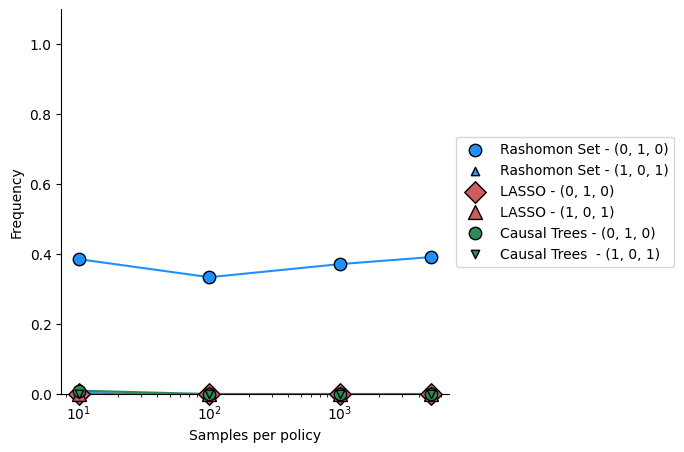

In [113]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

# Rashomon Means
ax.plot(rashomon_df["n_per_pol"], rashomon_df["(0, 1, 0)_mean"],
        color="dodgerblue", alpha=1, zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["(0, 1, 0)_mean"], s=80,
           color="dodgerblue", alpha=1, edgecolor="black", zorder=1.1, label="Rashomon Set - (0, 1, 0)")

ax.plot(rashomon_df["n_per_pol"], rashomon_df["(1, 0, 1)_mean"],
        color="dodgerblue", alpha=1, zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["(1, 0, 1)_mean"], marker="^",
           color="dodgerblue", alpha=1, edgecolor="black", zorder=1.1, label="Rashomon Set - (1, 0, 1)")

# LASSO
ax.plot(lasso_df["n_per_pol"], lasso_df["(0, 1, 0)_mean"],
        color="indianred", zorder=1)
ax.scatter(lasso_df["n_per_pol"], lasso_df["(0, 1, 0)_mean"], s=120, marker="D",
           color="indianred", edgecolor="black", zorder=3, clip_on=False,
           label="LASSO - (0, 1, 0)")

ax.plot(lasso_df["n_per_pol"], lasso_df["(1, 0, 1)_mean"], lw=2,
        color="indianred", zorder=1)
ax.scatter(lasso_df["n_per_pol"], lasso_df["(1, 0, 1)_mean"], marker="^", s=100,
           color="indianred", edgecolor="black", zorder=3, clip_on=False,
           label="LASSO - (1, 0, 1)")


# Causal trees
ax.plot(ct_df["n_per_pol"], ct_df["(0, 1, 0)_mean"], ls="-",
        color="seagreen", alpha=1, zorder=1)
ax.scatter(ct_df["n_per_pol"], ct_df["(0, 1, 0)_mean"], s=80, marker="o",
           color="seagreen", edgecolor="black", zorder=3, clip_on=False,
           label="Causal Trees - (0, 1, 0)")

ax.plot(ct_df["n_per_pol"], ct_df["(1, 0, 1)_mean"], ls="-.",
        color="seagreen", alpha=1, zorder=1)
ax.scatter(ct_df["n_per_pol"], ct_df["(1, 0, 1)_mean"], marker="v",
           color="seagreen", edgecolor="black", zorder=3, clip_on=False,
           label="Causal Trees  - (1, 0, 1)")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy")
ax.set_ylim(0, 1.1)
ax.set_ylabel("Frequency")

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("../Figures/sim_3/best_profile_freq.png", dpi=300, bbox_inches="tight")
plt.show()

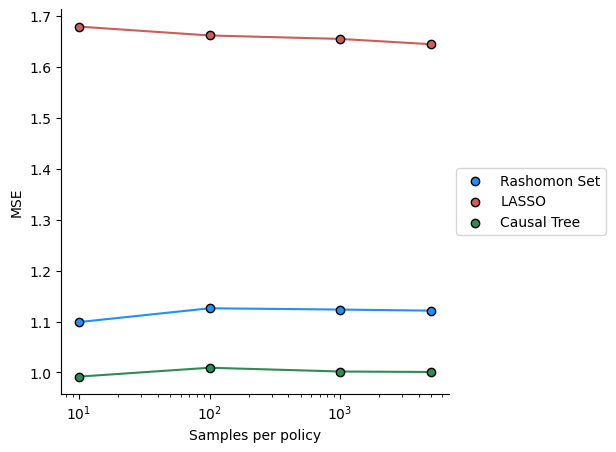

In [114]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["MSE_mean"],
        color="dodgerblue", zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["MSE_mean"],
           color="dodgerblue", edgecolor="black", zorder=1.1, label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["MSE_mean"],
        color="indianred", zorder=1)
ax.scatter(lasso_df["n_per_pol"], lasso_df["MSE_mean"],
           color="indianred", edgecolor="black", zorder=3, clip_on=False,
           label="LASSO")

ax.plot(ct_df["n_per_pol"], ct_df["MSE_mean"],
        color="seagreen", zorder=1)
ax.scatter(ct_df["n_per_pol"], ct_df["MSE_mean"],
           color="seagreen", edgecolor="black", zorder=3, clip_on=False,
           label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy")
# ax.set_ylim(0, 1.5)
ax.set_ylabel("MSE")

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/worst_case/MSE.png", dpi=300, bbox_inches="tight")
plt.show()

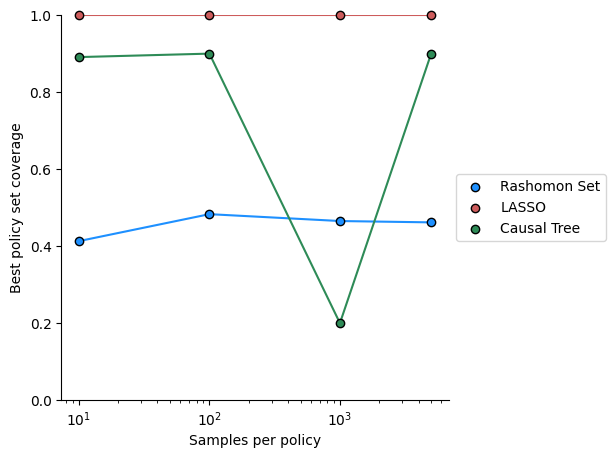

In [115]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["IOU_mean"],
        color="dodgerblue", zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["IOU_mean"],
           color="dodgerblue", edgecolor="black", zorder=1.1, label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["IOU_mean"],
        color="indianred", zorder=3)
ax.scatter(lasso_df["n_per_pol"], lasso_df["IOU_mean"],
           color="indianred", edgecolor="black", zorder=3.5, clip_on=False,
           label="LASSO")


ax.plot(ct_df["n_per_pol"], ct_df["IOU_mean"],
        color="seagreen", zorder=3)
ax.scatter(ct_df["n_per_pol"], ct_df["IOU_mean"],
           color="seagreen", edgecolor="black", zorder=3.5, clip_on=False,
           label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy")
ax.set_ylim(0, 1)
ax.set_ylabel("Best policy set coverage")

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/worst_case/policy_coverage.png", dpi=300, bbox_inches="tight")
plt.show()

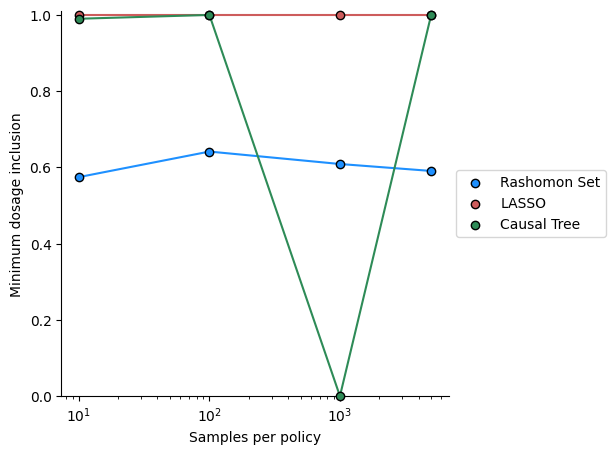

In [118]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["min_dosage_mean"],
        color="dodgerblue", zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["min_dosage_mean"],
           color="dodgerblue", edgecolor="black", zorder=1.1, label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["min_dosage_mean"],
        color="indianred", zorder=3)
ax.scatter(lasso_df["n_per_pol"], lasso_df["min_dosage_mean"],
           color="indianred", edgecolor="black", zorder=3.5, clip_on=False,
           label="LASSO")


ax.plot(ct_df["n_per_pol"], ct_df["min_dosage_mean"],
        color="seagreen", zorder=3)
ax.scatter(ct_df["n_per_pol"], ct_df["min_dosage_mean"],
           color="seagreen", edgecolor="black", zorder=3.5, clip_on=False,
           label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy")
ax.set_ylim(0, 1.01)
ax.set_ylabel("Minimum dosage inclusion")

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/worst_case/min_dosage_inclusion.png", dpi=300, bbox_inches="tight")
plt.show()

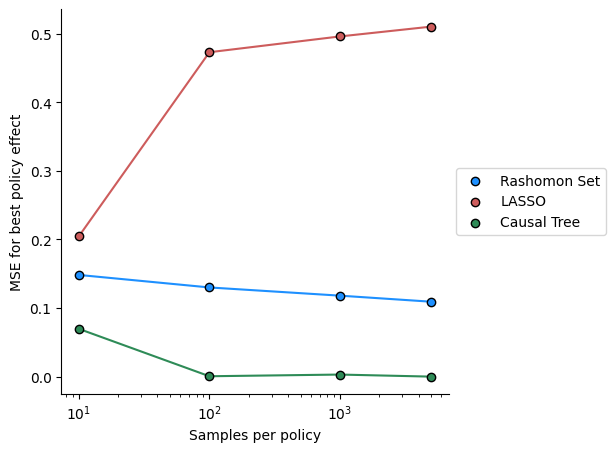

In [117]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["best_pol_MSE_mean"],
        color="dodgerblue", zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["best_pol_MSE_mean"],
           color="dodgerblue", edgecolor="black", zorder=1.1, label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["best_pol_MSE_mean"],
        color="indianred", zorder=1)
ax.scatter(lasso_df["n_per_pol"], lasso_df["best_pol_MSE_mean"],
           color="indianred", edgecolor="black", zorder=3, clip_on=False,
           label="LASSO")

ax.plot(ct_df["n_per_pol"], ct_df["best_pol_MSE_mean"],
        color="seagreen", zorder=1)
ax.scatter(ct_df["n_per_pol"], ct_df["best_pol_MSE_mean"],
           color="seagreen", edgecolor="black", zorder=3, clip_on=False,
           label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy")
# ax.set_ylim(0, 1)
ax.set_ylabel("MSE for best policy effect")

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/worst_case/best_policy_MSE.png", dpi=300, bbox_inches="tight")
plt.show()